In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("C:\suicide_rate_dataset.csv")
print((dataset[["suicides_no","suicides/100k pop"]]==0).sum())
dataset[["suicides_no","suicides/100k pop"]]=dataset[["suicides_no","suicides/100k pop"]].replace(0,np.NaN)
dataset.fillna(dataset.mean(),inplace=True)
dataset.head(20)

suicides_no          4281
suicides/100k pop    4281
dtype: int64


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.000000,312900,6.71000,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16.000000,308000,5.19000,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14.000000,289700,4.83000,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1.000000,21800,4.59000,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9.000000,274300,3.28000,Albania1987,0.776601,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1.000000,35600,2.81000,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6.000000,278800,2.15000,Albania1987,0.776601,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4.000000,257200,1.56000,Albania1987,0.776601,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1.000000,137500,0.73000,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,286.691023,311000,15.14694,Albania1987,0.776601,"2,156,624,900",796,Generation X


In [3]:
x=dataset.drop(["suicides_no"],axis=1)
y=dataset["suicides_no"]
data=pd.concat([x,y],axis=1)

data2=data.corr('pearson')
data2
abs(data2['suicides_no']).sort_values(ascending=False)

suicides_no           1.000000
population            0.598344
suicides/100k pop     0.287570
HDI for year          0.059259
gdp_per_capita ($)    0.056531
year                  0.005592
Name: suicides_no, dtype: float64

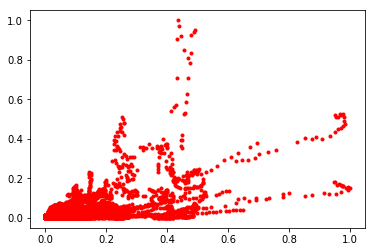

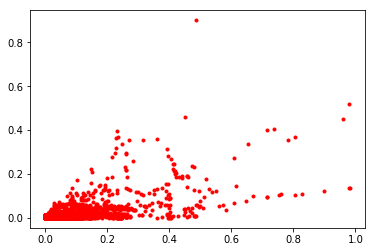

In [4]:
X = data['population']
Y = data['suicides_no']

X = np.array((X - X.min())/(X.max() - X.min()))
Y = np.array((Y - Y.min())/(Y.max() - Y.min()))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
plt.plot(x_train, y_train, 'r.')
plt.show()
plt.plot(x_test, y_test, 'r.')
plt.show()

In [5]:
def hypothesis(a,b,x):
    return a * x  + b

def error(a,b,x,y):
    e = 0
    m = len(y)
    for i in range(m):
        e += np.power((hypothesis(a,b,x[i]) - y[i]), 2)
    
    return (1/(2 * m)) * e

def step_gradient(a,b,x,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,x[i]) - y[i]) * x[i]
        grad_b += 1/m * hypothesis(a,b,x[i]) - y[i]
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a,b

def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
        a, b = step_gradient(a, b, x, y, learning_rate)
    return a, b

In [ ]:
a=0
b=1
learning_rate=0.01
iterations=10000
final_a,final_b=descend(a,b,x_train,y_train,learning_rate,iterations)

print(error(a,b,x_train,y_train))
print(error(final_a, final_b, x_train, y_train))
print(error(final_a, final_b, x_test, y_test))

plt.plot(x_train, y_train, 'r.', x_train, hypothesis(a, b, x_train), 'g', x_train, hypothesis(final_a, final_b, x_train), 'b', )
plt.show()
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g')
plt.show()

print(str((1-error(final_a, final_b, x_test, y_test))*100) + " %")

Error: 0.48792652066180353, a: 0, b: 1
